In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D
import datetime
from IPython.display import HTML
from PIL import Image
from IPython.display import display, clear_output
from functions import SMA, Trend
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
import re
import requests

import warnings
warnings.filterwarnings('ignore')

In [2]:
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import FloatRangeSlider, Dropdown, Checkbox, FloatText

In [3]:
import seaborn as sns

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# USD/RUB

## Распределение размерности по годам

In [5]:
analys = pd.read_excel('data/Результат_Закрытие_RUB.xlsx')
analys['Год'] = analys['Дата'].dt.year
analys['index'] = [i for i in range(len(analys))]

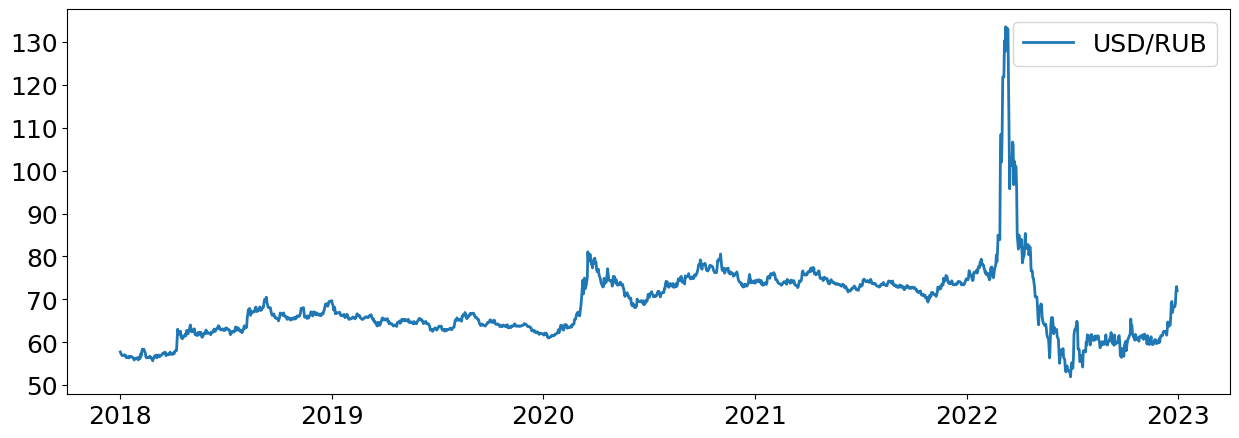

In [6]:
plt.figure(figsize=(15,5))
plt.plot(analys['Дата'], analys['Закрытие'], label='USD/RUB', linewidth=2)
plt.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

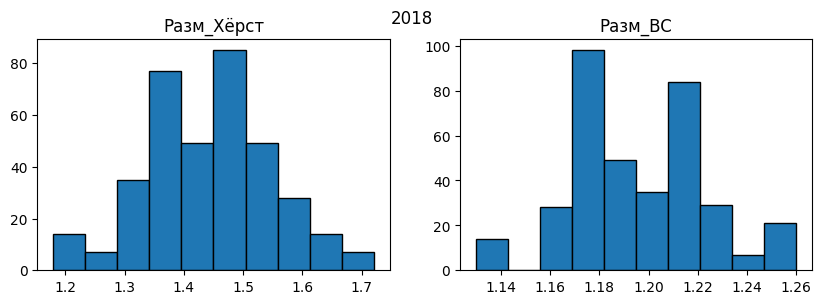

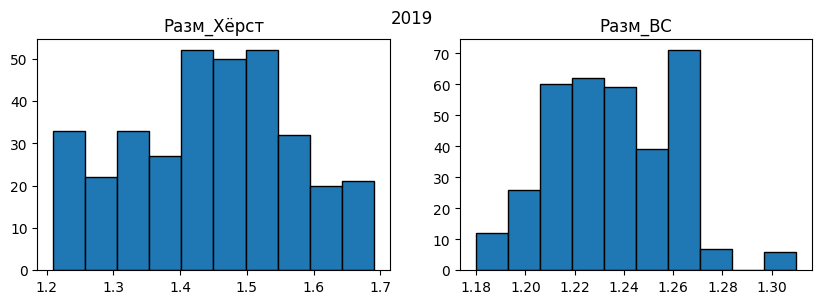

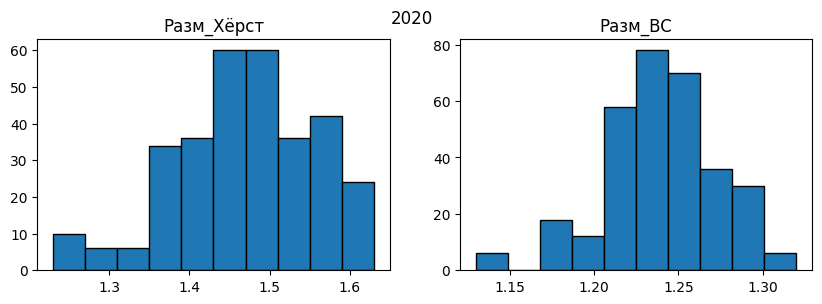

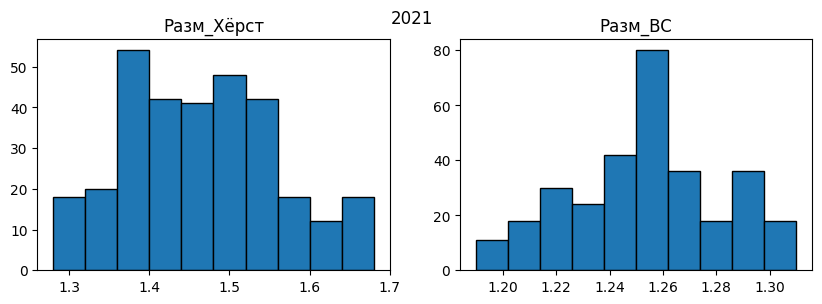

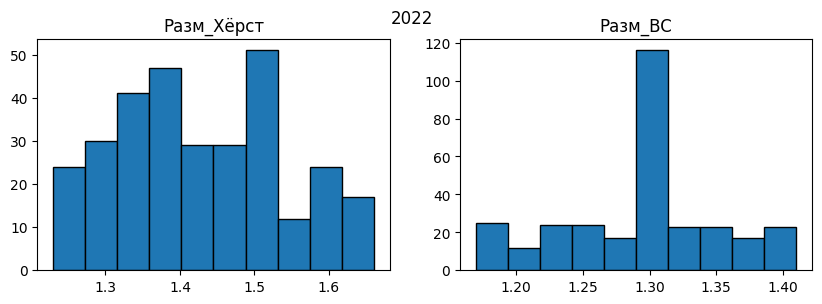

In [7]:
for year in analys['Год'].unique():
    window = analys.loc[analys['Год']==year]
    # Гистограмма распределения размерностей
    fig = plt.figure(figsize=(10,3))

    ax1 = fig.add_subplot(121)
    ax1.set_title('Разм_Хёрст')
    ax1.hist(window['Разм_Хёрст'], edgecolor='black') 
    
    ax2 = fig.add_subplot(122)
    ax2.set_title('Разм_BC')
    ax2.hist(window['Разм_BC'], edgecolor='black') 
    
    fig.suptitle(f'{year}')

## Динамика изменения закрытия к размерности

In [8]:
analys = pd.read_excel('data/Результат_Закрытие_RUB.xlsx')
analys['Год'] = analys['Дата'].dt.year

In [9]:
analys

,Дата,Закрытие,Объем,Изменение,Разм_Хёрст,Разм_BC,Размах,Тренд,Неделя,Год
0,2018-01-01,57.7687,490,NaN,1.46,1.17,1.5449,-0.000622,1,2018
1,2018-01-02,57.4143,90256,-0.613481,1.46,1.17,1.5449,-0.000622,1,2018
2,2018-01-03,57.1928,106610,-0.385792,1.46,1.17,1.5449,-0.000622,1,2018
3,2018-01-04,56.9313,116615,-0.457225,1.46,1.17,1.5449,-0.000622,1,2018
4,2018-01-05,56.9288,107617,-0.004391,1.46,1.17,1.5449,-0.000622,1,2018
...,...,...,...,...,...,...,...,...,...,...
1633,2022-12-26,68.3300,631,0.485294,1.47,1.35,7.1000,0.009121,52,2022
1634,2022-12-27,69.0000,220,0.980536,1.47,1.35,7.1000,0.009121,52,2022
1635,2022-12-28,71.7500,340,3.985507,1.47,1.35,7.1000,0.009121,52,2022
1636,2022-12-29,73.0000,514,1.742160,1.47,1.35,7.1000,0.009121,52,2022


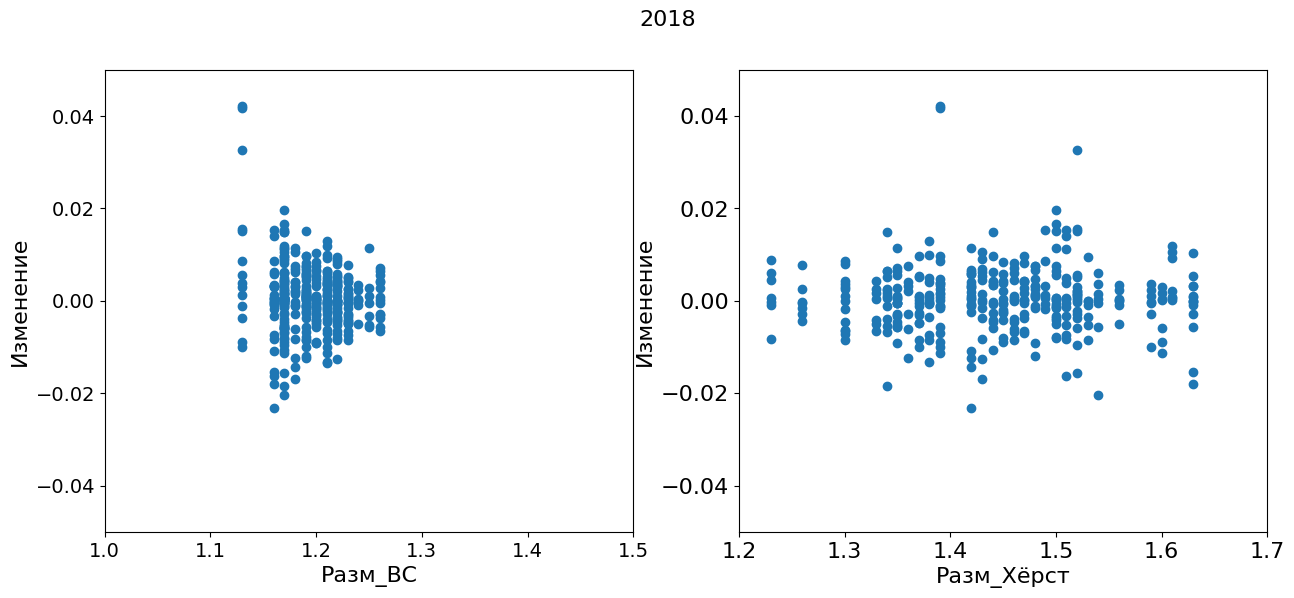

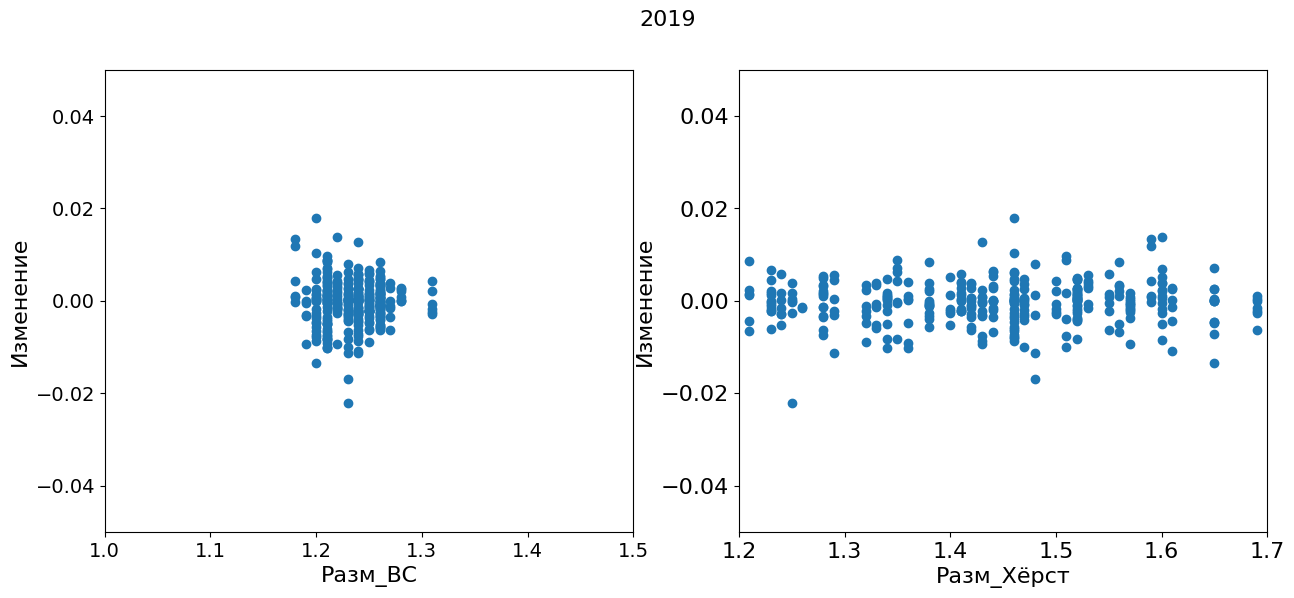

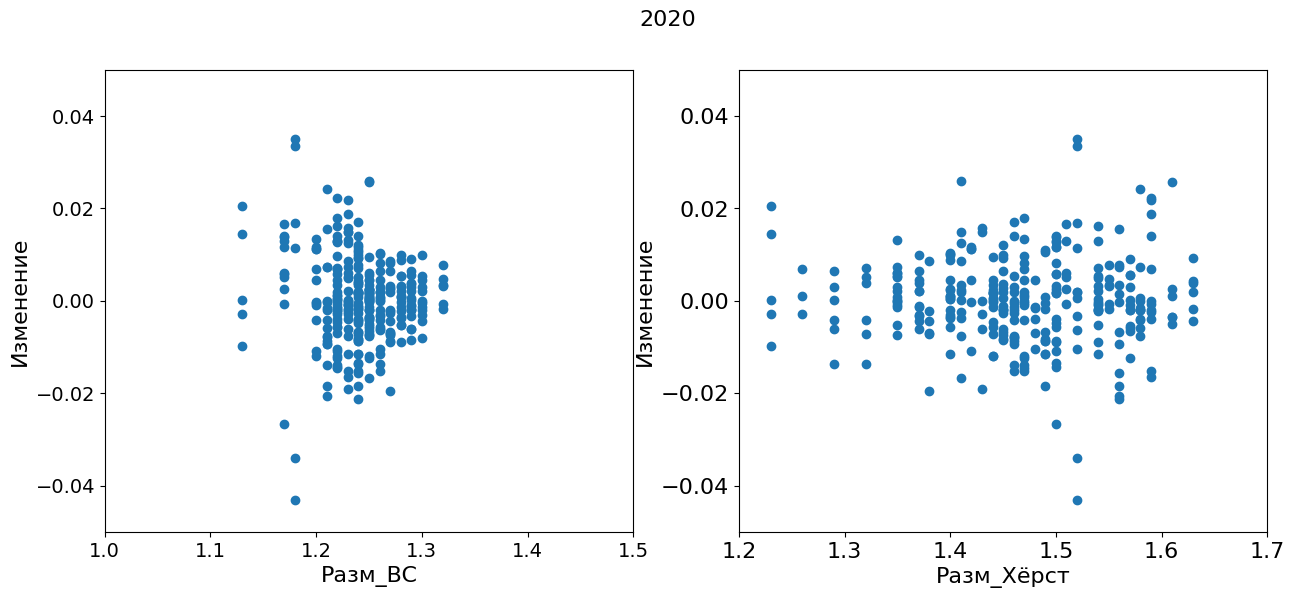

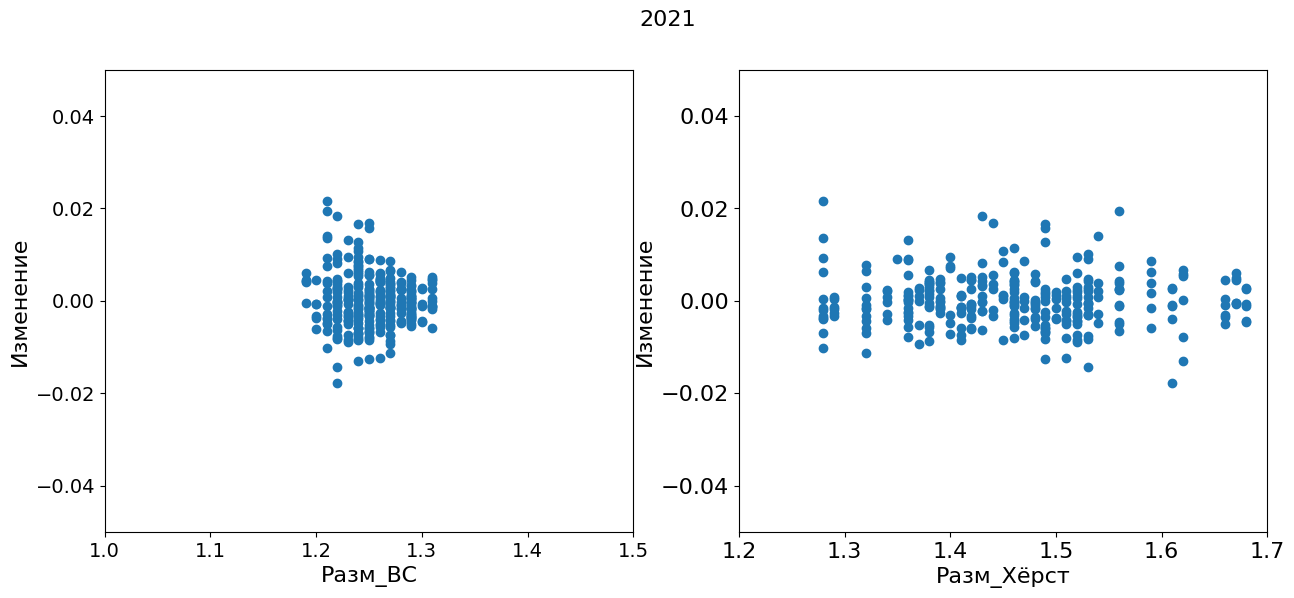

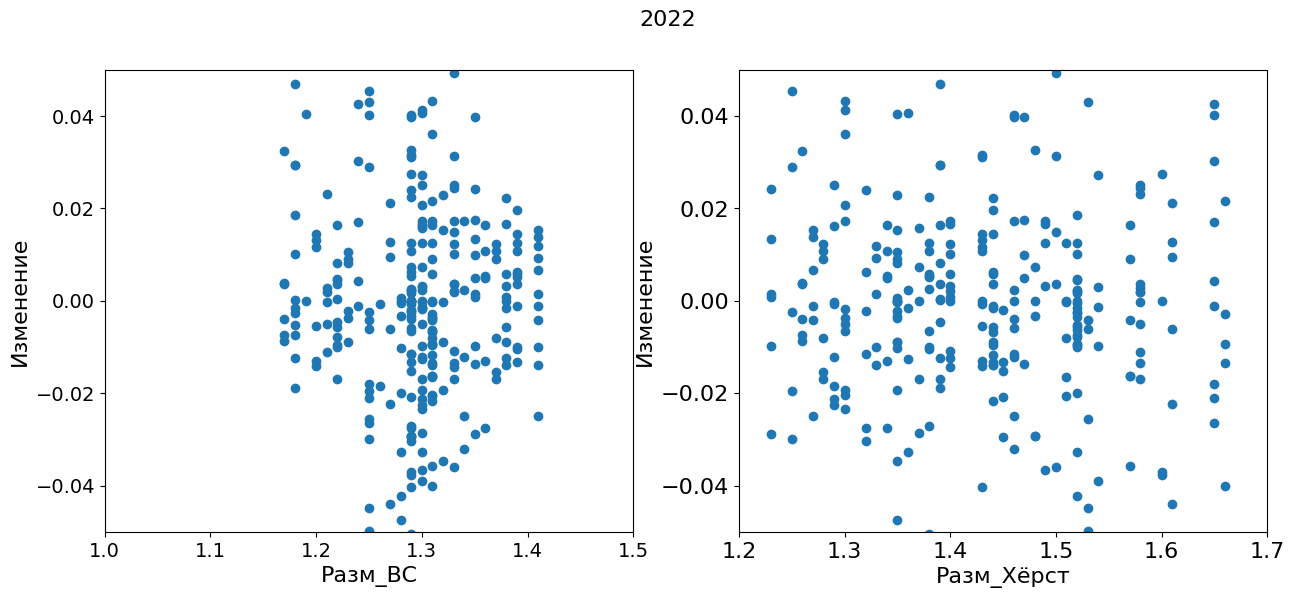

In [10]:
for year in analys['Год'].unique():
    window = analys.loc[(analys['Год'] == year)]
    
    window['Изменение'] = window['Закрытие'].pct_change()
    
    plt.figure(figsize=(15,6))
    
    plt.subplot(121)
    plt.scatter(window['Разм_BC'], window['Изменение'])
    plt.xlabel('Разм_BC', fontsize=16)
    plt.ylabel('Изменение', fontsize=16)
    plt.ylim([-0.05,0.05])
    plt.xlim([1.0,1.5])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.subplot(122)
    plt.scatter(window['Разм_Хёрст'], window['Изменение'])
    plt.xlabel('Разм_Хёрст', fontsize=16)
    plt.ylabel('Изменение', fontsize=16)
    plt.ylim([-0.05,0.05])
    plt.xlim([1.2,1.7])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    plt.suptitle(f'{year}', fontsize=16)
    plt.show()

## Оценка корреляции размерностей и Тренда, Размаха

In [11]:
analys = pd.read_excel('data/Результат_Закрытие_RUB.xlsx')
analys['Год'] = analys['Дата'].dt.year

In [12]:
analys = analys[['Закрытие', 'Объем', 'Изменение', 'Разм_Хёрст', 'Разм_BC', 'Тренд', 'Размах', 'Неделя', 'Год']]

In [13]:
analys = analys.groupby(by=['Год', 'Неделя'], as_index=False).agg({'Закрытие': 'mean',\
                                                                   'Изменение': 'mean',\
                                                                   'Объем' : 'max',\
                                                                   'Тренд': 'mean',\
                                                                   'Размах': 'mean',\
                                                                   'Разм_Хёрст': 'mean',\
                                                                   'Разм_BC': 'mean'})

Год 2018


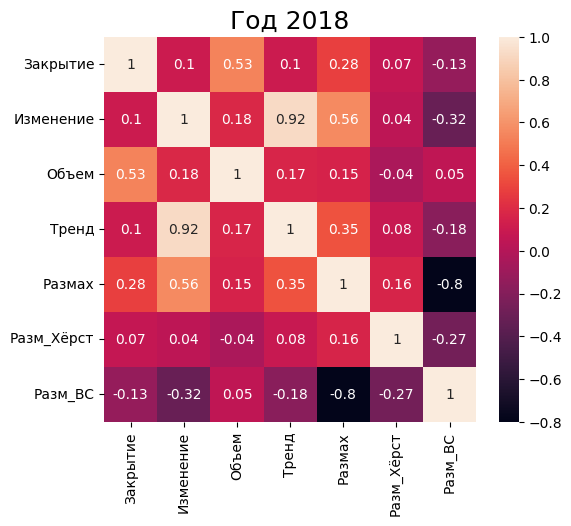

Размах        1.00
Изменение     0.56
Тренд         0.35
Закрытие      0.28
Разм_Хёрст    0.16
Name: Размах, dtype: float64
Год 2019


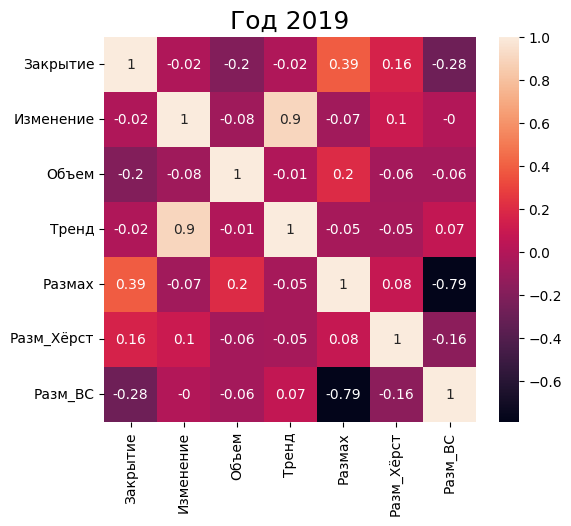

Размах        1.00
Закрытие      0.39
Объем         0.20
Разм_Хёрст    0.08
Тренд        -0.05
Name: Размах, dtype: float64
Год 2020


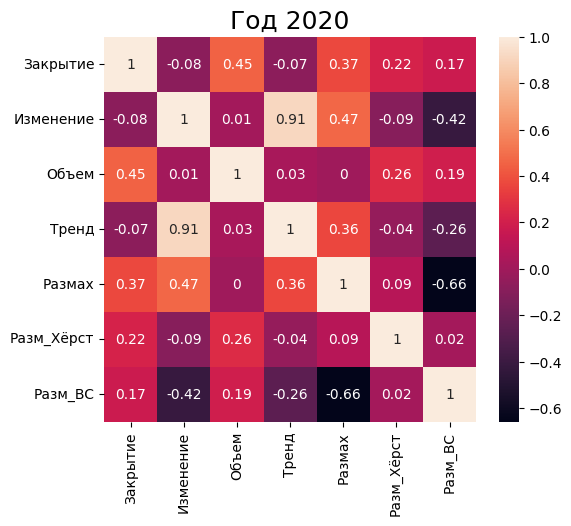

Размах        1.00
Изменение     0.47
Закрытие      0.37
Тренд         0.36
Разм_Хёрст    0.09
Name: Размах, dtype: float64
Год 2021


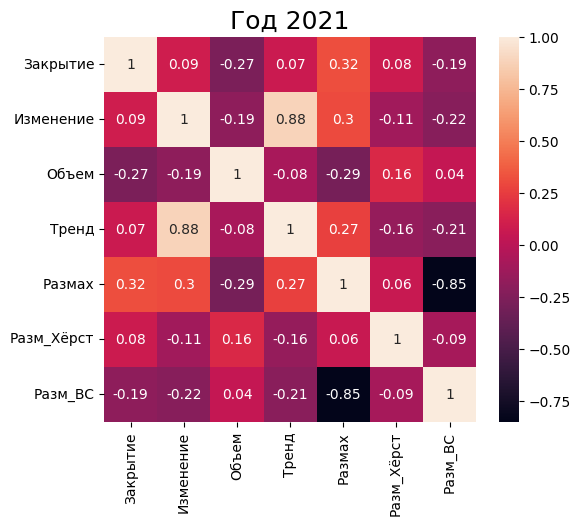

Размах        1.00
Закрытие      0.32
Изменение     0.30
Тренд         0.27
Разм_Хёрст    0.06
Name: Размах, dtype: float64
Год 2022


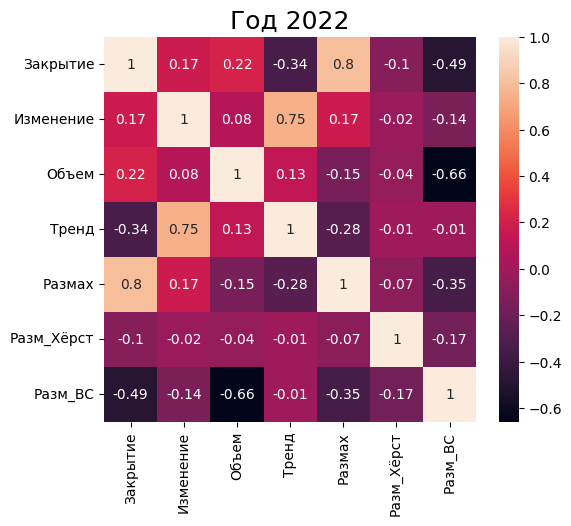

Размах        1.00
Закрытие      0.80
Изменение     0.17
Разм_Хёрст   -0.07
Объем        -0.15
Name: Размах, dtype: float64


In [14]:
for year in analys['Год'].unique():
    
    print(f'Год {year}')
    # Задаем фрейм данных
    window = analys.loc[analys['Год']==year]
    
    window = window.drop(columns=['Год', 'Неделя'])
       
    # вычисление матрицы корреляции
    corr_matrix = window.corr().round(2)
    relevant_factors = corr_matrix[['Разм_BC', 'Разм_Хёрст']]

    # визуализация матрицы корреляции с помощью heatmap
    plt.figure(figsize=(6,5))
    sns.heatmap(corr_matrix, annot=True)
    plt.title(f'Год {year}', fontsize=18)
    plt.show()

    # выбор факторов с наибольшей корреляцией с фактором Изменение
    relevant_factors = corr_matrix['Размах'].sort_values(ascending=False)[:5]

    print(relevant_factors)

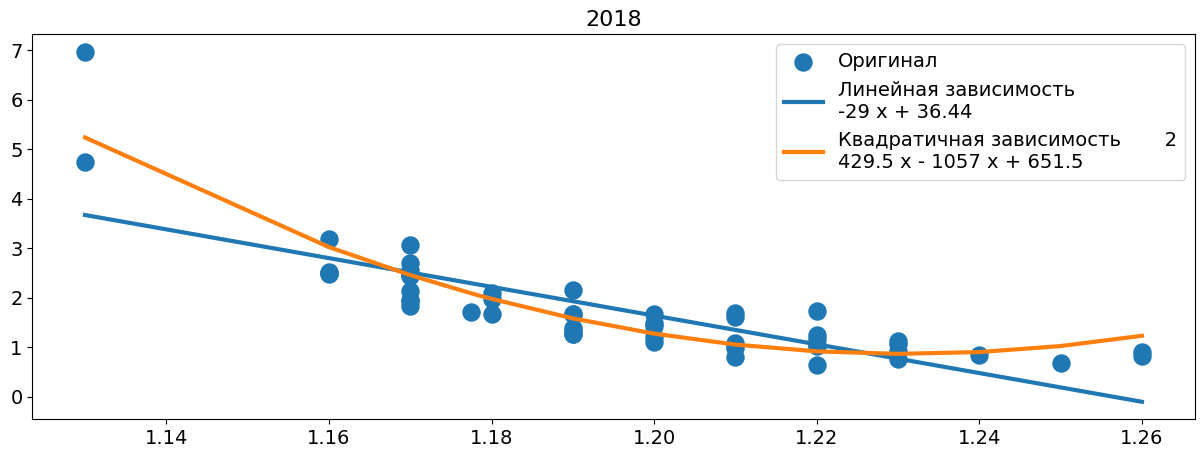

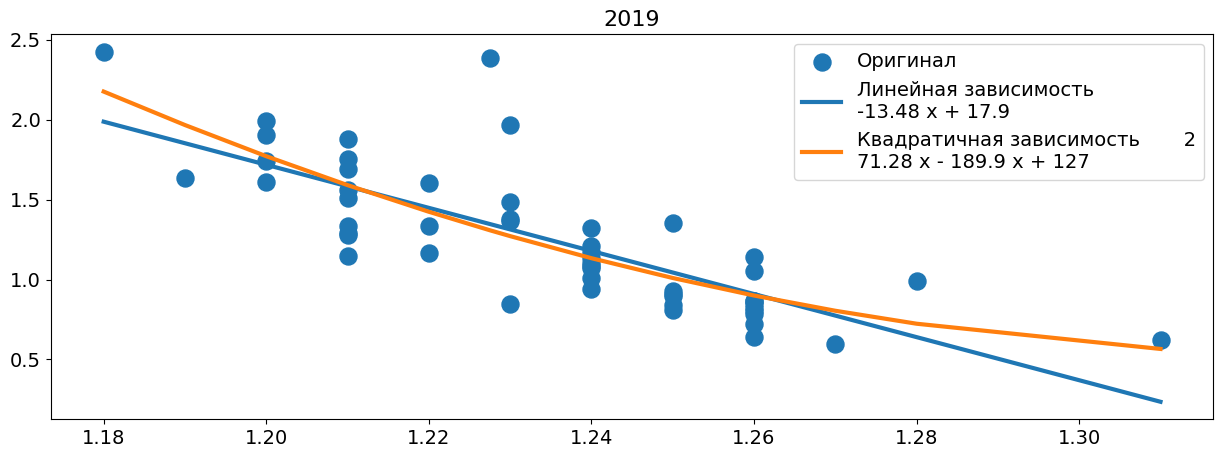

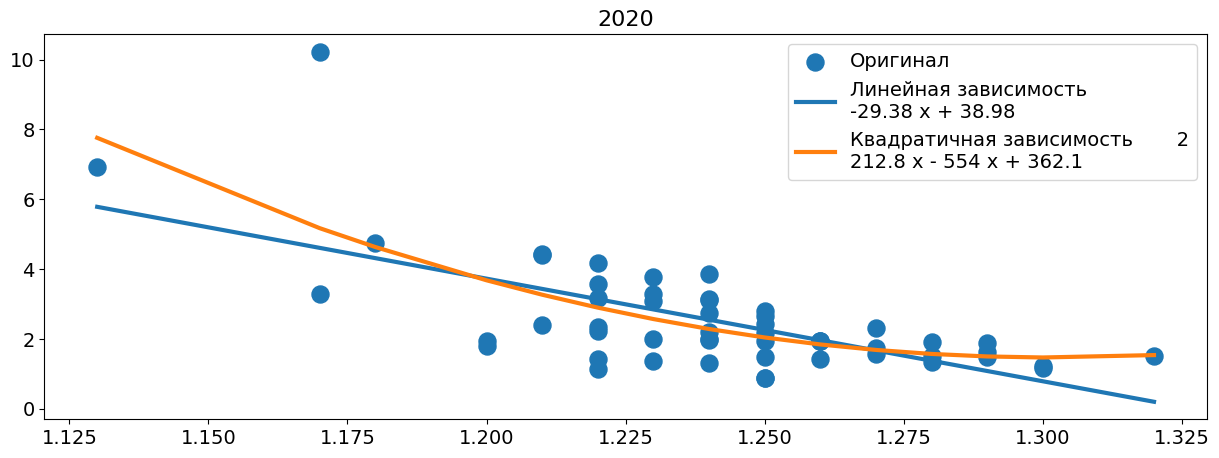

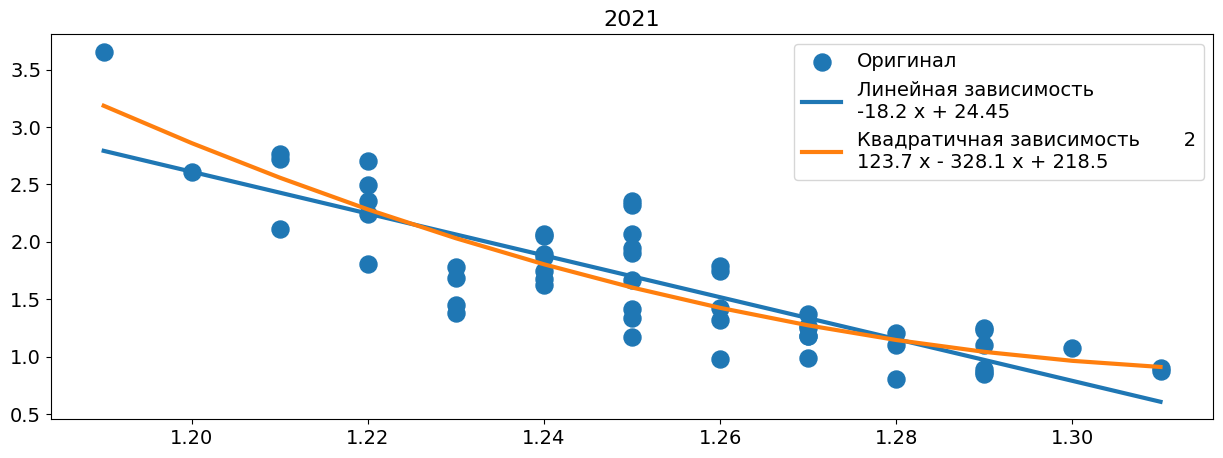

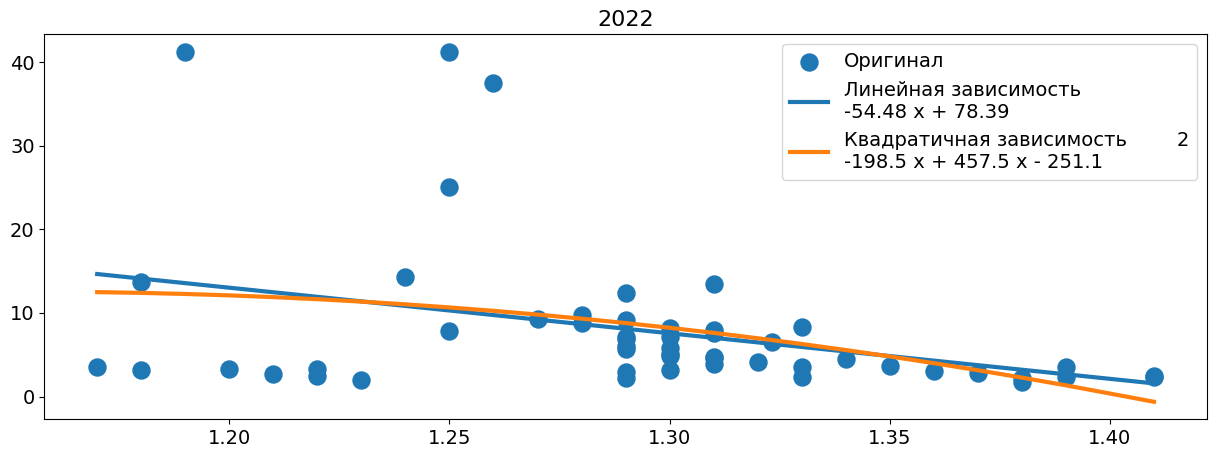

In [15]:
for year in analys['Год'].unique():
    window = analys.loc[analys['Год']==year]
    window = window.dropna()
    window = window.sort_values(by=['Разм_BC'])
    
    z = np.polyfit(window['Разм_BC'], window['Размах'], 1)
    p = np.poly1d(z)
    
    z2 = np.polyfit(window['Разм_BC'], window['Размах'], 2)
    p2 = np.poly1d(z2)
    # print(p2)
    
    plt.figure(figsize=(15,5))
    plt.title(f'{year}', fontsize=16)
    
    plt.scatter(window['Разм_BC'], window['Размах'], label='Оригинал', s=150)
    plt.legend(fontsize=14)
    
    plt.plot(window['Разм_BC'], p(window['Разм_BC']), label=f'Линейная зависимость{p}', linewidth=3)
    plt.legend(fontsize=14)
    
    plt.plot(window['Разм_BC'], p2(window['Разм_BC']), label=f'Квадратичная зависимость{p2}', linewidth=3)
    plt.legend(fontsize=14)
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.show()

In [16]:
analys = pd.read_excel('data/Результат_Закрытие_RUB.xlsx')
analys['Год'] = analys['Дата'].dt.year

In [17]:
analys = analys.loc[analys['Год'].isin([2018,2019,2020,2021,2022])]

In [18]:
analys = analys[['Закрытие', 'Объем', 'Изменение', 'Разм_Хёрст', 'Разм_BC', 'Тренд', 'Размах', 'Неделя', 'Год']]

In [19]:
analys = analys.groupby(by=['Год', 'Неделя'], as_index=False).agg({'Закрытие': 'mean',\
                                                                   'Изменение': 'mean',\
                                                                   'Объем' : 'max',\
                                                                   'Тренд': 'mean',\
                                                                   'Размах': 'mean',\
                                                                   'Разм_Хёрст': 'mean',\
                                                                   'Разм_BC': 'mean'})

In [20]:
analys = analys.dropna()

In [21]:
# разделение данных на независимую (X) и зависимые (y) переменные
X = analys[['Разм_BC', 'Тренд', 'Закрытие',]]
y = analys[['Размах']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

# обучение модели линейной регрессии
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [23]:
model.score(X_test, y_test)

0.8080467775962735

## Толщина линии / Инструмент

In [24]:
analys = pd.read_excel('data/Результат_Закрытие_RUB.xlsx')
analys['Год'] = analys['Дата'].dt.year

analys = analys[['Закрытие', 'Объем', 'Изменение', 'Разм_Хёрст', 'Разм_BC', 'Тренд', 'Размах', 'Неделя', 'Год', 'Дата']]

analys = analys.groupby(by=['Год', 'Неделя'], as_index=False).agg({'Дата': 'min',\
                                                               'Закрытие': 'mean',\
                                                               'Изменение': 'mean',\
                                                               'Объем' : 'max',\
                                                               'Тренд': 'mean',\
                                                               'Размах': 'mean',\
                                                               'Разм_Хёрст': 'mean',\
                                                               'Разм_BC': 'mean'})

In [25]:
analys = analys.dropna()

In [26]:
# Уравнение размаха
window = analys
window = window.sort_values(by=['Разм_BC'])
    
z = np.polyfit(window['Разм_BC'], window['Размах'], 1)
p = np.poly1d(z)
    
z2 = np.polyfit(window['Разм_BC'], window['Размах'], 2)
p2 = np.poly1d(z2)

In [29]:
def interactive_plot(year, dimension, dim_type, borders):
    
    # Получаем обработанные данные
    analys = pd.read_excel('data/Результат_Закрытие_RUB.xlsx')
    analys['Год'] = analys['Дата'].dt.year
    
    analys = analys[['Закрытие', 'Объем', 'Изменение', 'Разм_Хёрст', 'Разм_BC', 'Тренд', 'Размах', 'Неделя', 'Год', 'Дата']]
    
    analys = analys.groupby(by=['Год', 'Неделя'], as_index=False).agg({'Дата': 'min',\
                                                                   'Закрытие': 'mean',\
                                                                   'Изменение': 'mean',\
                                                                   'Объем' : 'max',\
                                                                   'Тренд': 'mean',\
                                                                   'Размах': 'mean',\
                                                                   'Разм_Хёрст': 'mean',\
                                                                   'Разм_BC': 'mean'})
    
    analys['Изменение'] = analys['Закрытие'].pct_change()
    analys['Изменение'] = analys['Изменение'].shift(-1)
    
    # Определяем отображаемое окно
    window = analys.loc[(analys['Год'] == year)]
    window = window.dropna()
    window = window.sort_values(by=['Дата'])
    
    print(f"Максимальная размерность {window[dim_type].max()}")
    print(f"Минимальный размерность {window[dim_type].min()}")
    
    maximum = window[dim_type].max()
    
    # Считаем 5 минутные данные 
    data_finam_18 = pd.read_csv('data/USD_RUB_180101_221231_5m.csv', encoding='cp1251')
    data_finam_18['Дата'] = pd.to_datetime(data_finam_18['Дата'].astype(str) + ' ' + data_finam_18['Время'].astype(str))
    data_finam_18['Изменение'] = data_finam_18['Закрытие'].pct_change() * 100
    data_finam_18['Изменение'] = data_finam_18['Изменение'] + 10
    data_finam_18['timestamp'] = pd.to_numeric(data_finam_18['Дата']).astype(float) / 10 ** 18
    data_finam_18 = data_finam_18.drop(columns=['Максимум', 'Минимум', 'Открытие'])
    
    week_for_plot_5m = data_finam_18.loc[(data_finam_18['Дата'].dt.year == year)]
    
    plt.figure(figsize=(15, 5))
    
    # Строим 5 минутный график
    plt.plot(week_for_plot_5m['Дата'], week_for_plot_5m['Закрытие'], color='orange', linewidth=1, label='Курс валюты')
        
    # Строим график по неделям
    for i in range(2, len(window)+1):
        week_for_plot = window.iloc[i-1:i+1]
        
        delta = maximum - week_for_plot[dim_type].max()
        width = 100*(delta)
        
        # if week_for_plot[dim_type].iloc[0] > dimension:
        #     plt.plot(week_for_plot['Дата'], week_for_plot['Закрытие'], color='r', linewidth=width, alpha=0.5)
        # else:
        #     plt.plot(week_for_plot['Дата'], week_for_plot['Закрытие'], color='b', linewidth=width, alpha=0.5)
            
        # Строим размах 
        if borders:
            scope_p2 = p2(week_for_plot[dim_type].iloc[0])/2
            scope_model = model.predict(week_for_plot[['Разм_BC', 'Тренд', 'Закрытие',]])/2
            
            plt.plot(week_for_plot['Дата'], week_for_plot['Закрытие']+scope_p2, color='g', linewidth=2)
            plt.plot(week_for_plot['Дата'], week_for_plot['Закрытие']-scope_p2, color='g', linewidth=2)
            
            plt.plot(week_for_plot['Дата'], week_for_plot['Закрытие']+scope_model[0], color='indigo', linewidth=2)
            plt.plot(week_for_plot['Дата'], week_for_plot['Закрытие']-scope_model[0], color='indigo', linewidth=2)
            
        if i==len(window):
            plt.plot(week_for_plot['Дата'], week_for_plot['Закрытие']+scope_p2, color='g', linewidth=2, label='Квадратичное уравнение')
            plt.plot(week_for_plot['Дата'], week_for_plot['Закрытие']-scope_p2, color='g', linewidth=2)
            
            plt.plot(week_for_plot['Дата'], week_for_plot['Закрытие']+scope_model[0], color='indigo', linewidth=2, label='К-ближайших соседей')
            plt.plot(week_for_plot['Дата'], week_for_plot['Закрытие']-scope_model[0], color='indigo', linewidth=2)

    plt.legend(fontsize=18)                
    plt.xlabel('Год', fontsize=18)
    plt.ylabel('Закрытие', fontsize=18)
    plt.title(f'Год {year}', fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.grid(True)
    plt.show()

In [30]:
interact(interactive_plot, year=(2018, 2022, 1),\
         dimension=FloatText(),\
         dim_type=Dropdown(options=[('Разм_BC'), ('Разм_Хёрст')]),\
         borders=Checkbox(value=True))

interactive(children=(IntSlider(value=2020, description='year', max=2022, min=2018), FloatText(value=0.0, desc…

<function __main__.interactive_plot(year, dimension, dim_type, borders)>